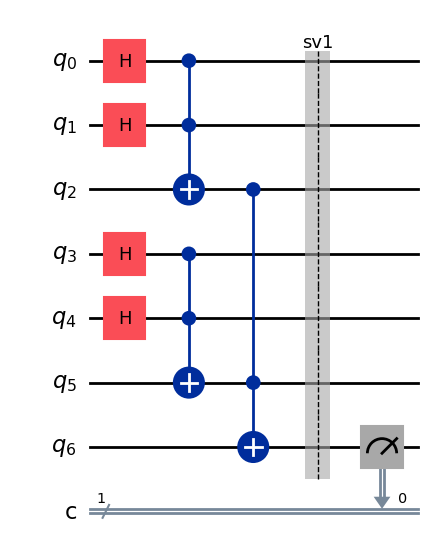

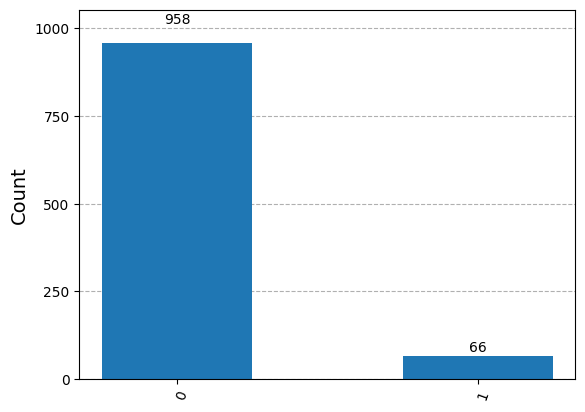

In [28]:
# Title: quantum_circuit3.iypnb
# Author: Charles "Chuck" Garcia

from IPython.display import display
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Initialize and Create Quantum Circuit
qc = QuantumCircuit(7, 1)
qc.h(0)
qc.h(1)
qc.ccx(0, 1, 2)

qc.h(3)
qc.h(4)
qc.ccx(3, 4, 5)
qc.ccx(2, 5, 6)

# Save State and Measure
qc.save_statevector("sv1")
qc.measure(6, 0)

# Compile and Run Circuit
backend = AerSimulator()
qc_compiled = transpile(qc, backend)
result = backend.run(qc_compiled, shots=1_024).result()

# Retrieve and Display results
counts = result.get_counts(qc)
sv1 = result.data(0)["sv1"]
display(qc.draw(output="mpl"))
display(plot_histogram(counts))

In [26]:
print("In Dirac notation, the output state vector would be:")
display(sv1.draw("latex"))

print("We can observe that the probability for q6 is 1/16 ~= .06")
print(
    "This means that out of 1024 runs, we'd expect about 64 runs to output q6 in the 1 state"
)
print("Looking at the histogram confirms this since 1024/16 = 64")

In Dirac notation, the output state vector would be:


<IPython.core.display.Latex object>

We can observe that the probability for q6 is 1/16 ~= .06
This means that out of 1024 runs, we'd expect 64 runs to output q6 in the 1 state
Looking at the histogram confirms this since 1024/16 = 64
